In [1]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv("/Users/Alex/Downloads/Pre-procesado.csv")

In [18]:
df = df.drop(labels=['KaggleSet'], axis=1) #ELIMINE EL KAGGLESET PORQUE OCURRE UN FALLO CON VARIABLES STRING, OTRA COSA SERIA
                                           # CAMBIAR ESAS VARIABLES DEL 1 AL 4 PARA USARLAS

In [19]:
# Entrene la división de prueba para evitar el sobreajuste
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['Label'], axis=1), df['Label'], 
    test_size=1,
    random_state=0)

In [20]:
X_train.head()

,index,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,KaggleWeight
60498,432493,532493,153.541,13.850,83.206,81.976,4.211,719.978,-3.739,2.632,...,2,102.704,-1.272,-1.920,72.803,2.939,0.699,175.507,0.000461,0.000840
53227,688526,788526,138.446,1.833,62.411,140.682,0.560,170.804,0.552,2.290,...,3,172.656,-0.514,-0.716,69.112,-1.074,-2.313,282.655,0.000461,0.000839
21333,545779,645779,137.621,88.006,73.570,1.436,-999.000,-999.000,-999.000,3.040,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.005721,0.010415
3885,817228,917228,137.341,16.591,103.245,346.650,1.493,189.269,0.535,1.212,...,3,112.596,1.791,-1.492,109.589,0.298,-1.855,357.919,0.005721,0.259892
51521,583357,683357,131.239,52.354,104.615,1.051,-999.000,-999.000,-999.000,2.902,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.005721,0.010415


In [21]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.01958788, 0.01972032, 0.16162924, 0.10475438, 0.09073523,
       0.03741413, 0.04435359, 0.04291699, 0.04299716, 0.01873539,
       0.01415154, 0.04422093, 0.04352583, 0.04864694, 0.03350845,
       0.06635565, 0.008551  , 0.00485209, 0.01686453, 0.01609716,
       0.00560155, 0.0318435 , 0.00250008, 0.03600421, 0.02031867,
       0.03553606, 0.0332062 , 0.02010514, 0.02380496, 0.02996612,
       0.02295514, 0.03321586, 0.64111273, 0.64109773])

In [22]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Weight                         0.641113
KaggleWeight                   0.641098
DER_mass_MMC                   0.161629
DER_mass_transverse_met_lep    0.104754
DER_mass_vis                   0.090735
PRI_tau_pt                     0.066356
DER_met_phi_centrality         0.048647
DER_deltaeta_jet_jet           0.044354
DER_sum_pt                     0.044221
DER_pt_ratio_lep_tau           0.043526
DER_prodeta_jet_jet            0.042997
DER_mass_jet_jet               0.042917
DER_pt_h                       0.037414
PRI_met_sumet                  0.036004
PRI_jet_leading_pt             0.035536
DER_lep_eta_centrality         0.033508
PRI_jet_all_pt                 0.033216
PRI_jet_leading_eta            0.033206
PRI_met                        0.031844
PRI_jet_subleading_eta         0.029966
PRI_jet_subleading_pt          0.023805
PRI_jet_subleading_phi         0.022955
PRI_jet_num                    0.020319
PRI_jet_leading_phi            0.020105
EventId                        0.019720


<AxesSubplot:>

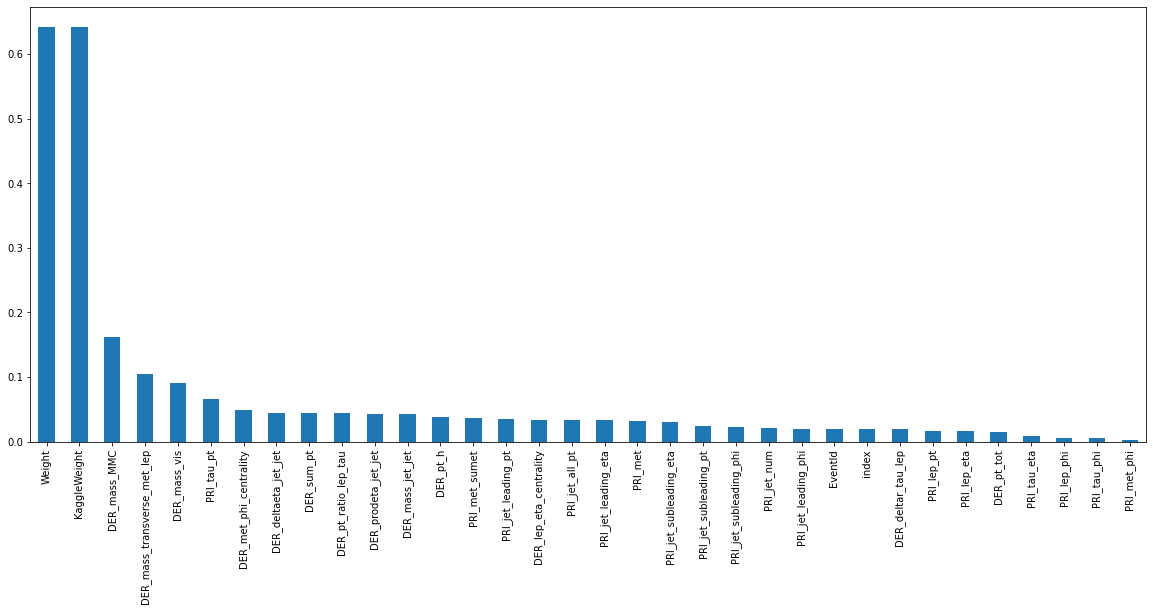

In [23]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [26]:
df['Label'].unique()

array([0, 1], dtype=int64)